In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger as TensorBoardLogger
import tensorboard


import numpy as np
from lstm_second import BasicLSTM
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, r'C:\Users\Spenc\Documents\GitHub\itcs-8156\utils')

from preprocessing import (market_prepro,
                           lstm_timeseries_feat_and_targ,
                           
)

In [7]:

def makepred(model, dataset):
    y = []
    t = []
    for ii in dataset:
        feat, lab = ii

        y.append(model.forward(feat).detach().numpy()[0])
        t.append(lab.numpy()[0])


    return y, t

def scatter_results(Y,T,title):
    plt.figure(figsize=(9,9))
    plt.scatter(Y,T)
    plt.xlabel('Model Prediction')
    plt.ylabel('True Value')
    plt.title(title)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1042/1042 [00:07<00:00, 137.14it/s, v_num=521]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1042/1042 [00:07<00:00, 137.04it/s, v_num=521]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 519/519 [00:01<00:00, 273.46it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch        0.01389656938459802
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1548/1548 [00:10<00:00, 151.60it/s, v_num=522]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1548/1548 [00:10<00:00, 151.51it/s, v_num=522]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 773/773 [00:02<00:00, 278.01it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.003693605045391422
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 820/820 [00:06<00:00, 127.71it/s, v_num=523]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 820/820 [00:06<00:00, 127.59it/s, v_num=523]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 408/408 [00:01<00:00, 276.83it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch        0.00424984531748512
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 180/180 [00:02<00:00, 60.50it/s, v_num=524]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 180/180 [00:02<00:00, 60.35it/s, v_num=524]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 88/88 [00:00<00:00, 272.33it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.008411039249126999
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 267/267 [00:03<00:00, 74.24it/s, v_num=525]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 267/267 [00:03<00:00, 74.11it/s, v_num=525]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 132/132 [00:00<00:00, 265.81it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.004283275534434486
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1042/1042 [00:08<00:00, 128.31it/s, v_num=526]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1042/1042 [00:08<00:00, 128.21it/s, v_num=526]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 519/519 [00:01<00:00, 264.15it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.0008614682454511162
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1548/1548 [00:11<00:00, 140.35it/s, v_num=527]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1548/1548 [00:11<00:00, 140.28it/s, v_num=527]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 773/773 [00:02<00:00, 260.24it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       1.96134112110431e-05
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 820/820 [00:06<00:00, 118.85it/s, v_num=528]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 820/820 [00:06<00:00, 118.74it/s, v_num=528]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 408/408 [00:01<00:00, 252.92it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch      0.00046283614817349127
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 180/180 [00:03<00:00, 57.41it/s, v_num=529]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 180/180 [00:03<00:00, 57.29it/s, v_num=529]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 88/88 [00:00<00:00, 235.14it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.009643804874373744
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 267/267 [00:03<00:00, 72.83it/s, v_num=530]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 267/267 [00:03<00:00, 72.70it/s, v_num=530]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 132/132 [00:00<00:00, 264.48it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch        0.00868176033602592
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1030/1030 [00:15<00:00, 64.62it/s, v_num=531]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1030/1030 [00:15<00:00, 64.59it/s, v_num=531]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 507/507 [00:03<00:00, 145.25it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch        0.0281968179428432
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 1536/1536 [00:22<00:00, 68.60it/s, v_num=532]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 1536/1536 [00:22<00:00, 68.59it/s, v_num=532]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 761/761 [00:05<00:00, 145.90it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch      0.00032759922380523913
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 808/808 [00:12<00:00, 63.43it/s, v_num=533]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 808/808 [00:12<00:00, 63.40it/s, v_num=533]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 396/396 [00:02<00:00, 142.75it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.0002173962817125304
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 168/168 [00:04<00:00, 39.66it/s, v_num=534]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 168/168 [00:04<00:00, 39.61it/s, v_num=534]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 76/76 [00:00<00:00, 140.94it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch        0.6842557903035413
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
------------------------------
38        Trainable params
0         Non-trainable params
38        Total params
0.000     Total estimated model params size (MB)
c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 255/255 [00:05<00:00, 47.06it/s, v_num=535]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 255/255 [00:05<00:00, 47.01it/s, v_num=535]


c:\Users\Spenc\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 120/120 [00:00<00:00, 144.86it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_loss_epoch       0.004292230151278656
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


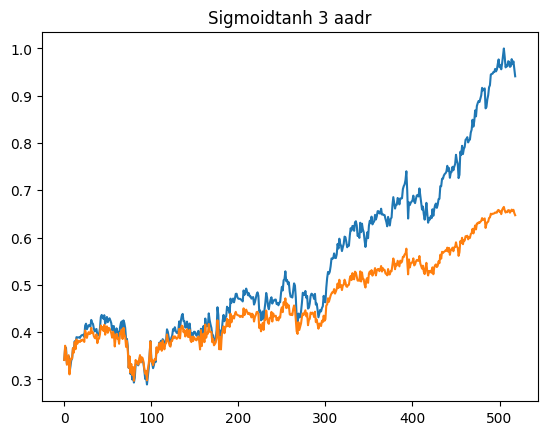

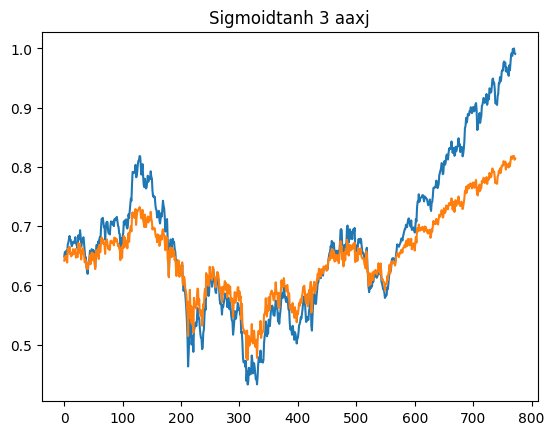

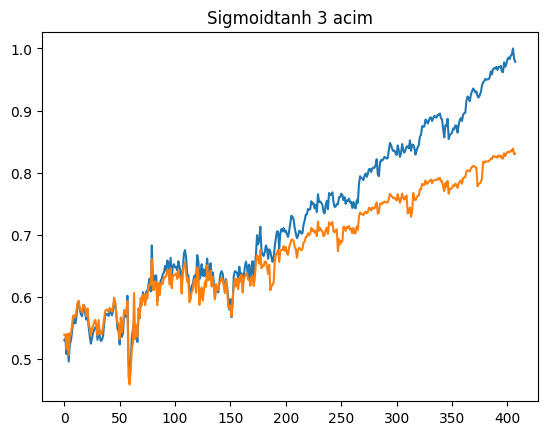

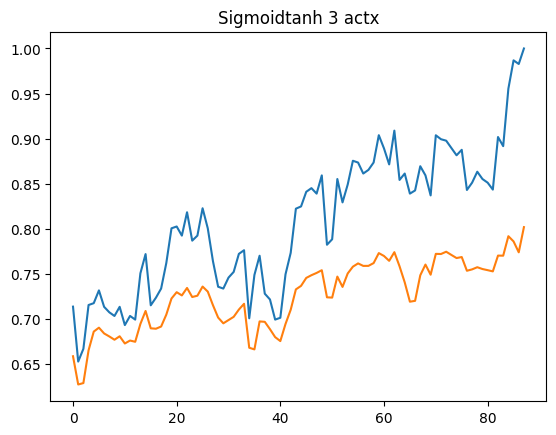

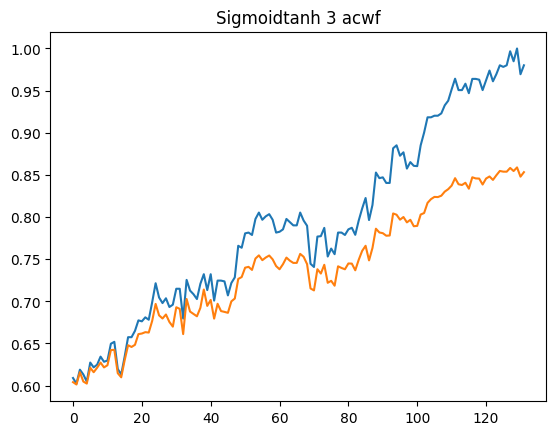

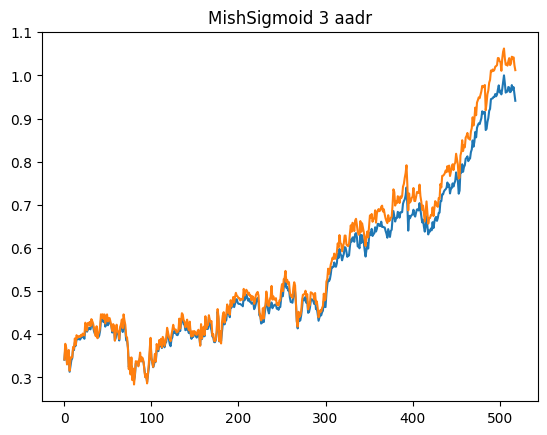

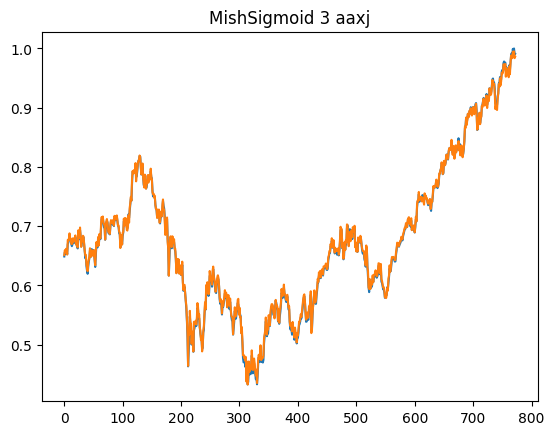

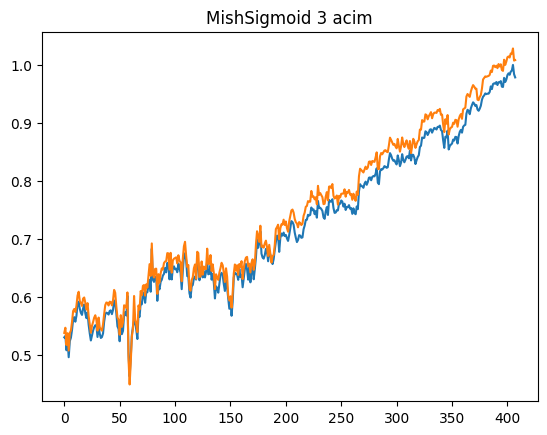

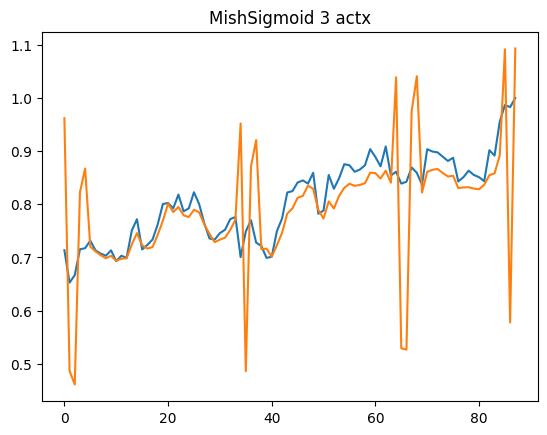

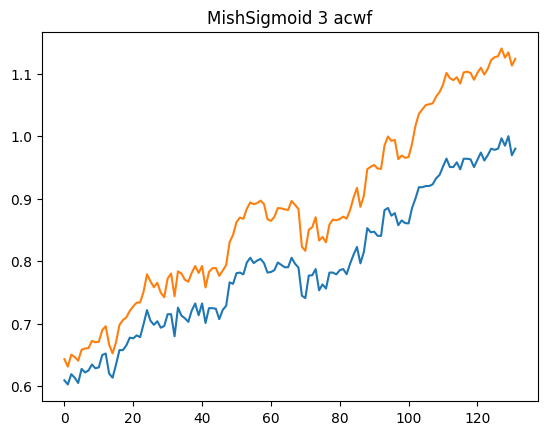

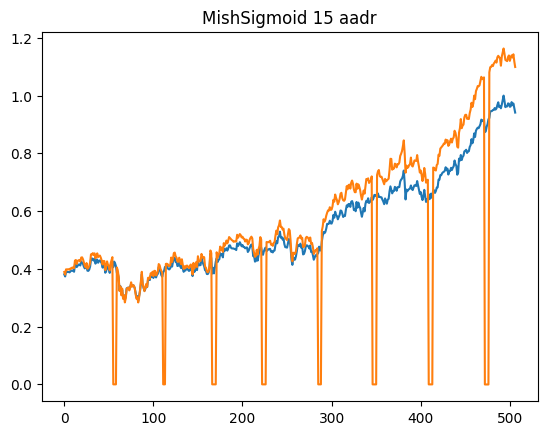

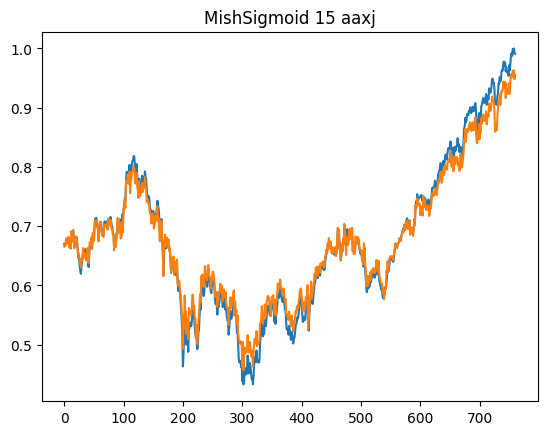

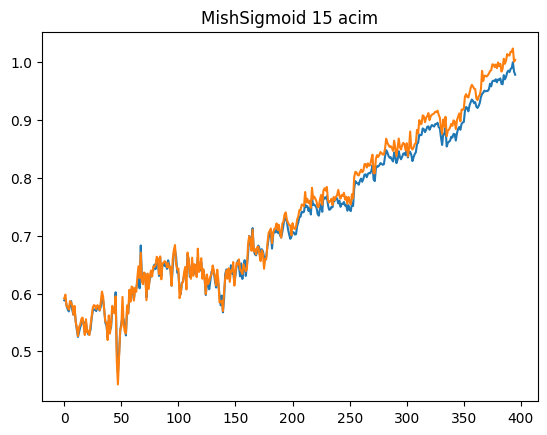

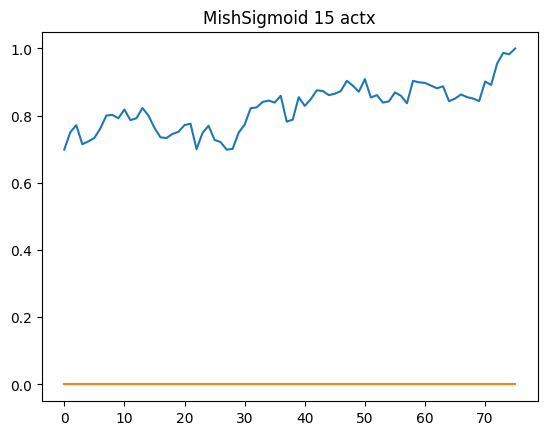

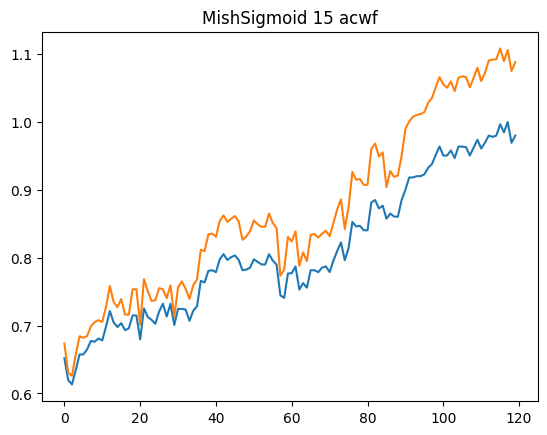

In [8]:
results_stock_sweep = []

# st = "Stocks"
st = "ETFs"

#Input stock name
stock_names = ["aadr", "aaxj", "acim", "actx", "acwf"]

actfn1 = ['Sigmoid', 'Mish', 'Mish']
actfn2 = ['tanh', 'Sigmoid', 'Sigmoid']

test_days = [3, 3, 15]

for i in range(len(actfn1)):

    act1fn1=actfn1[i]
    act2fn2=actfn2[i]
    #number of days as features
    day_feat = test_days[i]
    #number of days to use as features
    day_targ = 1
    day_targ = day_targ - 1
    
    for j in range(len(stock_names)):

        sn = stock_names[j]
        f = r'G:\My Drive\School\UNCC\P.h.D\Coursework\2023 - SPRING\ITCS 8156 - Machine Learning\Project\archive'
        X_train, X_test, T_train, T_test = market_prepro(f,st,sn,False,splitdata=True, stdzr='minmax')

        # dl_train, ds_train = lstm_timeseries_feat_and_targ(X_train[['Open','Low']], T_train, 4, 1,None)
        # dl_test, ds_test = lstm_timeseries_feat_and_targ(X_test[['Open','Low']], T_test, 4, 1,  None)

        dl_train, ds_train = lstm_timeseries_feat_and_targ(X_train, T_train, day_feat, day_targ, [ 'Year', 'Month' ,'Day_date', 'Day'])
        dl_test, ds_test = lstm_timeseries_feat_and_targ(X_test, T_test, day_feat, day_targ, [ 'Year', 'Month' ,'Day_date', 'Day'])

        mdl_stock = BasicLSTM(num_feat=7, num_hiddens=1, num_out=1, lr=0.01, actfn1=act1fn1, actfn2=act2fn2)
        mdl_stock.forward(ds_train[0][0])

        logger = TensorBoardLogger("lightning_logs", name="market")
        trainer = pl.Trainer(max_epochs=10,logger=logger) # with default learning rate, 0.001 (this tiny learning rate makes learning slow)
        trainer.fit(mdl_stock, train_dataloaders=dl_train)
        trainer.test(mdl_stock,dataloaders=dl_test)
        torch.save(mdl_stock, act1fn1+act2fn2+str(day_feat)+sn)

        y_test, t_test = makepred(mdl_stock, ds_test)
        y_train, t_train = makepred(mdl_stock, ds_train)

        train_score = r2_score(t_train, y_train)
        test_score = r2_score(t_test, y_test)

        add_res_sweep = [act1fn1, act2fn2, sn, day_feat, train_score, test_score]

        results_stock_sweep.append(add_res_sweep)


        plt.figure()
        plt.plot(range(len(t_test)),t_test)
        plt.plot(range(len(y_test)),y_test)
        plt.title(act1fn1+act2fn2+' '+str(day_feat)+' '+sn)
torch.save(results_stock_sweep, 'Stock Sweep Results')